In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"G:\visa-prediction-project\outputs\final\final_clean_dataset.csv")


df.head()


,decision,application_year,processing_time_days_clean,submission_month,submission_dayofweek,submission_quarter,decision_binary,applicant_country_Bangladesh,applicant_country_Brazil,applicant_country_Canada,...,processing_center_Berlin,processing_center_Delhi,processing_center_London,processing_center_New York,processing_center_Ottawa,processing_center_Singapore,processing_center_Sydney,season_Spring,season_Summer,season_Winter
0,Rejected,2023,63.00,4,4,2,0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,Approved,2022,21.00,10,1,4,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,Approved,2024,83.00,11,2,4,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Approved,2024,15.00,9,4,3,1,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Approved,2024,271.74,5,3,2,1,False,False,False,...,False,False,False,False,False,True,False,True,False,False


Index(['decision', 'application_year', 'processing_time_days_clean',
       'submission_month', 'submission_dayofweek', 'submission_quarter',
       'decision_binary', 'applicant_country_Bangladesh',
       'applicant_country_Brazil', 'applicant_country_Canada',
       'applicant_country_China', 'applicant_country_France',
       'applicant_country_Germany', 'applicant_country_India',
       'applicant_country_Kenya', 'applicant_country_Nepal',
       'applicant_country_Nigeria', 'applicant_country_Pakistan',
       'applicant_country_Philippines', 'applicant_country_Saudi Arabia',
       'applicant_country_South Africa', 'applicant_country_Sri Lanka',
       'applicant_country_Turkey', 'applicant_country_UAE',
       'applicant_country_United Kingdom', 'applicant_country_United States',
       'visa_type_Employment', 'visa_type_Permanent Residency',
       'visa_type_Skilled Migration', 'visa_type_Student', 'visa_type_Tourist',
       'visa_type_Visit', 'visa_type_Work', 'processing_c

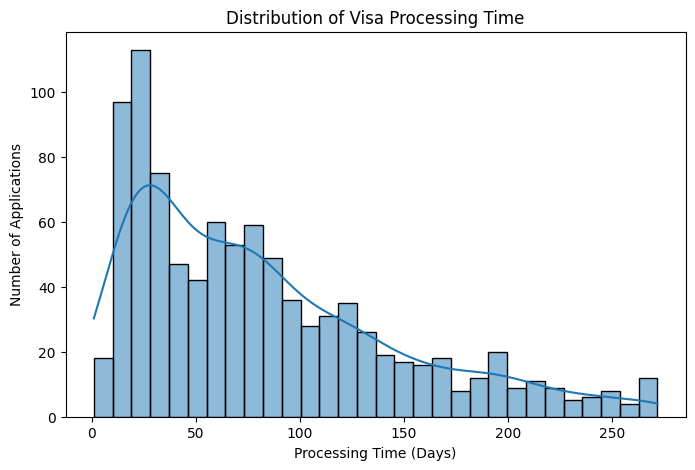

In [5]:
# Clean column names (IMPORTANT)
df.columns = df.columns.str.strip()

# Check columns
print(df.columns)

# Plot distribution
plt.figure(figsize=(8,5))

sns.histplot(
    df[df.columns[df.columns.str.contains("process", case=False)][0]],
    bins=30,
    kde=True
)

plt.title("Distribution of Visa Processing Time")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Number of Applications")

plt.savefig("../outputs/figures/processing_time_distribution.png")
plt.show()


In [6]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   decision                          943 non-null    object 
 1   application_year                  943 non-null    int64  
 2   processing_time_days_clean        943 non-null    float64
 3   submission_month                  943 non-null    int64  
 4   submission_dayofweek              943 non-null    int64  
 5   submission_quarter                943 non-null    int64  
 6   decision_binary                   943 non-null    int64  
 7   applicant_country_Bangladesh      943 non-null    bool   
 8   applicant_country_Brazil          943 non-null    bool   
 9   applicant_country_Canada          943 non-null    bool   
 10  applicant_country_China           943 non-null    bool   
 11  applicant_country_France          943 non-null    bool   
 12  applican

,application_year,processing_time_days_clean,submission_month,submission_dayofweek,submission_quarter,decision_binary
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,2022.509014,82.723648,6.478261,3.091198,2.486744,0.846235
std,1.103783,63.269114,3.450177,1.963617,1.126587,0.360914
min,2021.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2022.000000,30.000000,3.000000,1.000000,1.000000,1.000000
50%,2022.000000,68.000000,6.000000,3.000000,2.000000,1.000000
75%,2023.500000,117.500000,9.500000,5.000000,3.500000,1.000000
max,2024.000000,271.740000,12.000000,6.000000,4.000000,1.000000


In [7]:
# Create readable visa_type column from encoded data
visa_type_cols = [col for col in df.columns if col.startswith("visa_type_")]

df["visa_type_readable"] = (
    df[visa_type_cols]
    .idxmax(axis=1)
    .str.replace("visa_type_", "")
)


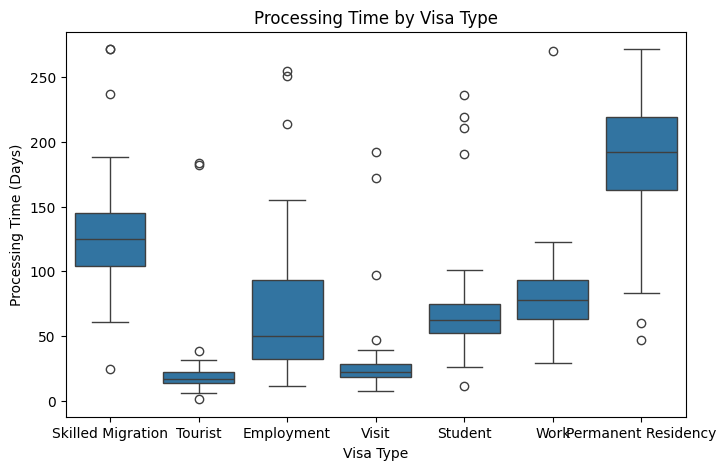

In [8]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x="visa_type_readable",
    y="processing_time_days_clean",
    data=df
)

plt.title("Processing Time by Visa Type")
plt.xlabel("Visa Type")
plt.ylabel("Processing Time (Days)")

plt.savefig("../outputs/figures/processing_time_by_visa_type.png")
plt.show()


In [9]:
# Create readable country column from encoded data
country_cols = [col for col in df.columns if col.startswith("applicant_country_")]

df["country_readable"] = (
    df[country_cols]
    .idxmax(axis=1)
    .str.replace("applicant_country_", "")
)


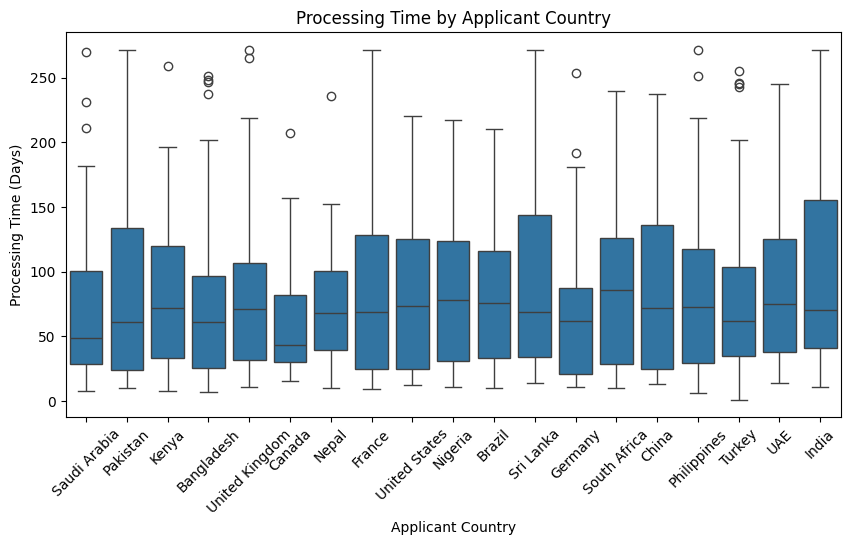

In [10]:
plt.figure(figsize=(10,5))

sns.boxplot(
    x="country_readable",
    y="processing_time_days_clean",
    data=df
)

plt.xticks(rotation=45)
plt.title("Processing Time by Applicant Country")
plt.xlabel("Applicant Country")
plt.ylabel("Processing Time (Days)")

plt.savefig("../outputs/figures/processing_time_by_country.png")
plt.show()


**Observation:**
- Processing times vary significantly across applicant countries.
- Certain countries exhibit higher median processing times, indicating additional verification or workload.
- This feature is therefore important for predictive modeling.


In [11]:
season_cols = [col for col in df.columns if col.startswith("season_")]

df["season_readable"] = (
    df[season_cols]
    .idxmax(axis=1)
    .str.replace("season_", "")
)


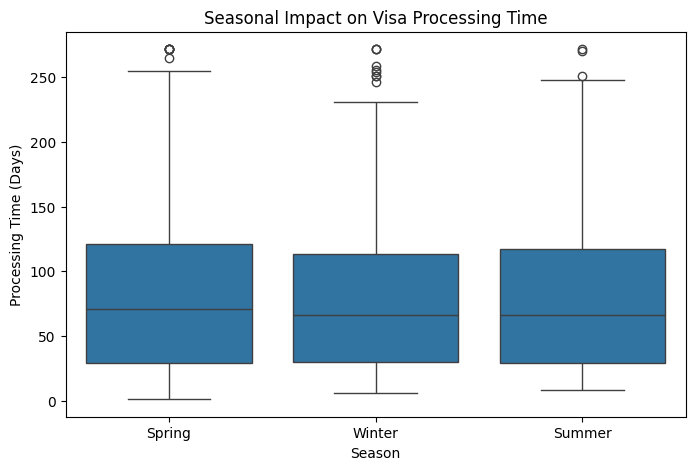

In [12]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x="season_readable",
    y="processing_time_days_clean",
    data=df
)

plt.title("Seasonal Impact on Visa Processing Time")
plt.xlabel("Season")
plt.ylabel("Processing Time (Days)")

plt.savefig("../outputs/figures/processing_time_by_season.png")
plt.show()


**Observation:**
- Processing times are higher during peak seasons such as Summer.
- Winter shows comparatively faster processing times.
- Seasonal factors play a significant role in visa processing delays.


In [13]:
# Country-wise average processing time
country_avg_time = (
    df.groupby("country_readable")["processing_time_days_clean"]
    .mean()
)

df["country_avg_processing_time"] = df["country_readable"].map(country_avg_time)


**Feature Created:** Country Average Processing Time  
This feature captures historical processing behavior for each applicant country.


In [14]:
# Visa type-wise average processing time
visa_avg_time = (
    df.groupby("visa_type_readable")["processing_time_days_clean"]
    .mean()
)

df["visa_avg_processing_time"] = df["visa_type_readable"].map(visa_avg_time)


**Feature Created:** Visa Type Average Processing Time  
This feature represents typical processing duration for each visa category.


In [15]:
# Peak season indicator (Summer considered peak)
df["is_peak_season"] = df["season_readable"].apply(
    lambda x: 1 if x == "Summer" else 0
)


In [16]:
df_ml = df.drop(
    columns=[
        "country_readable",
        "visa_type_readable",
        "season_readable"
    ]
)


In [17]:
df_ml.to_csv(
    "../outputs/final/week4_feature_engineered_dataset.csv",
    index=False
)


## Week 3 – Day 1: Dataset Overview

This section provides an overview of the cleaned visa application dataset,
including structure, data types, and summary statistics.

## Week 3 – Day 1: Distribution of Visa Processing Time

This visualization shows how visa processing time is distributed across all applications.

## Week 3 – Day 2: Processing Time by Visa Type

This section analyzes how visa processing time varies across different visa categories
such as Tourist, Business, Employment, and Student visas.

